# NYISO Fuel Mix Over Time

In [1]:
import isodata
import pandas as pd
iso = isodata.NYISO()

In [2]:
df = iso.get_fuel_mix_today()
df

Fuel Category,Time,Dual Fuel,Hydro,Natural Gas,Nuclear,Other Fossil Fuels,Other Renewables,Wind
0,2022-10-23 00:05:00-04:00,2076.0,1724.0,2103.0,3323.0,0.0,246.0,921.0
1,2022-10-23 00:10:00-04:00,1910.0,1739.0,2065.0,3325.0,0.0,246.0,939.0
2,2022-10-23 00:15:00-04:00,1936.0,1698.0,2066.0,3323.0,0.0,245.0,964.0
3,2022-10-23 00:20:00-04:00,2026.0,1666.0,2076.0,3324.0,0.0,246.0,970.0
4,2022-10-23 00:25:00-04:00,2065.0,1574.0,2079.0,3325.0,0.0,246.0,981.0
...,...,...,...,...,...,...,...,...
243,2022-10-23 20:10:00-04:00,3516.0,3062.0,2708.0,3323.0,0.0,245.0,455.0
244,2022-10-23 20:15:00-04:00,3503.0,3051.0,2686.0,3323.0,0.0,245.0,448.0
245,2022-10-23 20:20:00-04:00,3454.0,2980.0,2669.0,3325.0,0.0,245.0,436.0
246,2022-10-23 20:25:00-04:00,3369.0,2960.0,2662.0,3325.0,0.0,245.0,448.0


In [3]:
# Get fuel mix
df = iso.get_historical_fuel_mix(start="Nov 1, 2017", end="Oct 22, 2022")

100%|███████████████████████████████████████████| 60/60 [01:03<00:00,  1.05s/it]


In [4]:
# re sample to monthly data
data = df.set_index("Time").resample('MS').sum().reset_index()
data.head(10)

Fuel Category,Time,Dual Fuel,Hydro,Natural Gas,Nuclear,Other Fossil Fuels,Other Renewables,Wind
0,2017-11-01 00:00:00-04:00,18959579.0,30447482.0,21914126.0,44359507.0,417465.0,2459898.0,5366198.0
1,2017-12-01 00:00:00-05:00,26492744.0,30399671.0,26247968.0,44349267.0,1426102.0,2419416.0,4839025.0
2,2018-01-01 00:00:00-05:00,31903170.0,27668473.0,26511086.0,48802629.0,3627454.0,2141482.0,6163104.0
3,2018-02-01 00:00:00-05:00,15425092.0,26941421.0,23025745.0,39918885.0,284680.0,2007094.0,5344987.0
4,2018-03-01 00:00:00-05:00,19666517.0,32764341.0,22999813.0,43192132.0,1491575.0,2332648.0,4163407.0
5,2018-04-01 00:00:00-04:00,19699877.0,30384362.0,24537954.0,34689734.0,297352.0,2355395.0,4523767.0
6,2018-05-01 00:00:00-04:00,24745520.0,31193895.0,22509300.0,41533621.0,340653.0,2278286.0,3586994.0
7,2018-06-01 00:00:00-04:00,29921618.0,27057113.0,25584381.0,46038444.0,204724.0,2334606.0,2597822.0
8,2018-07-01 00:00:00-04:00,46345174.0,27594915.0,35905445.0,47102524.0,1947993.0,2433483.0,2486365.0
9,2018-08-01 00:00:00-04:00,50191808.0,27201483.0,37326637.0,45460108.0,1215035.0,2452371.0,2505057.0


In [19]:
percentages = data.set_index("Time")
percentages = percentages.div(percentages.sum(axis=1), axis=0).reset_index()

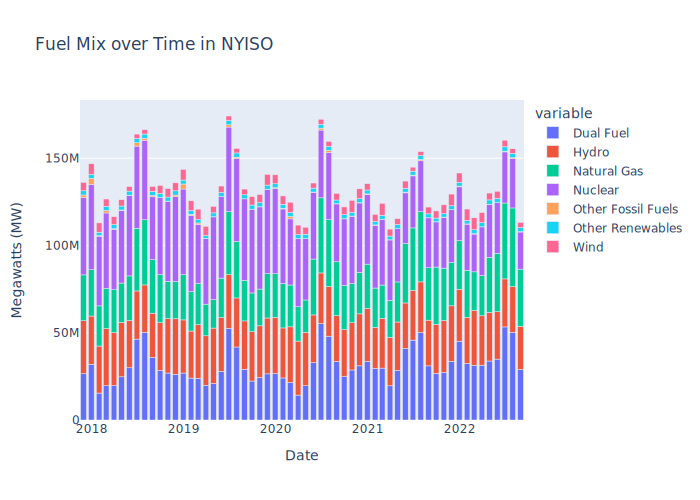

In [22]:
import plotly.express as px

fig = px.bar(data[1:-1], x="Time", y=df.columns[1:], title="Fuel Mix over Time in NYISO")
fig.update_layout(
    xaxis_title="Date", yaxis_title="Megawatts (MW)"
)
fig.show("svg")

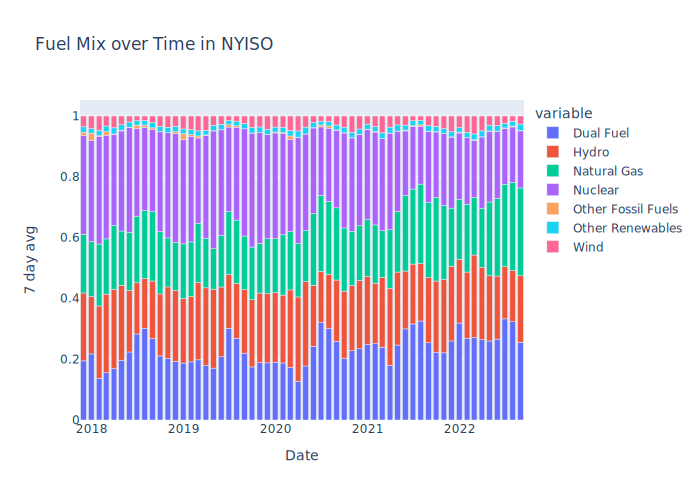

In [21]:
fig = px.bar(percentages[1:-1], x="Time", y=df.columns[1:], title="Fuel Mix over Time in NYISO")
fig.update_layout(
    xaxis_title="Date", yaxis_title="Percent"
)
fig.show("svg")